
A challenge that users face is that, for a given y-axis value (e.g. 42,000), it is difficult to know which x-axis values are most likely to be representative, because the confidence levels overlap and their distributions are different (the lengths of the confidence interval bars are unequal). One of the solutions the authors propose for this problem is to allow users to indicate the y-axis value of interest (e.g. 42,000) and then draw a horizontal line and color bars based on this value. So bars might be colored red if they are definitely above this value (given the confidence interval), blue if they are definitely below this value, or white if they contain this value.

<br>
<br>

**Easiest option:** Implement the bar coloring as described above - a color scale with only three colors, (e.g. blue, white, and red). Assume the user provides the y axis value of interest as a parameter or variable.


**Harder option:** Implement the bar coloring as described in the paper, where the color of the bar is actually based on the amount of data covered (e.g. a gradient ranging from dark blue for the distribution being certainly below this y-axis, to white if the value is certainly contained, to dark red if the value is certainly not contained as the distribution is above the axis).

**Even Harder option:** Add interactivity to the above, which allows the user to click on the y axis to set the value of interest. The bar colors should change with respect to what value the user has selected.

In [1]:
# Use the following data for this assignment:

import pandas as pd
import numpy as np

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
df

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,-8941.531897,127788.667612,-71887.743011,-79146.060869,425156.114501,310681.166595,50581.575349,88349.230566,185804.513522,281286.947277,...,171938.760289,150650.759924,203663.976475,-377877.158072,-197214.093861,24185.008589,-56826.729535,-67319.766489,113377.299342,-4494.878538
1993,-51896.094813,198350.518755,-123518.252821,-129916.759685,216119.147314,49845.883728,149135.648505,62807.672113,23365.577348,-109686.264981,...,-44566.520071,101032.122475,117648.199945,160475.622607,-13759.888342,-37333.493572,103019.841174,179746.127403,13455.493990,34442.898855
1994,152336.932066,192947.128056,389950.263156,-93006.152024,100818.575896,5529.230706,-32989.370488,223942.967178,-66721.580898,47826.269111,...,165085.806360,74735.174090,107329.726875,199250.734156,-36792.202754,-71861.846997,26375.113219,-29328.078384,65858.761714,-91542.001049
1995,-69708.439062,-13289.977022,-30178.390991,55052.181256,152883.621657,12930.835194,63700.461932,64148.489835,-29316.268556,59645.677367,...,-13901.388118,50173.686673,53965.990717,4128.990173,72202.595138,39937.199964,139472.114293,59386.186379,73362.229590,28705.082908


In [2]:
dft= df.T

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.cm import get_cmap

In [4]:
means = dft.mean()
stds = dft.std()
# number of samples
n = dft.shape[0]
#standart error mean
sem = stds/np.sqrt(n)
# confidence interval 95
ci95 = sem*1.96

In [5]:
#initialize y
y=37000

In [6]:
# tools for color
cmap = get_cmap('coolwarm')
norm = mpl.colors.Normalize(0,100)

    
def get_color(y):
    df_colors = pd.DataFrame([])
    perc = 100*(((means-y)/sem)+1.96)/3.92
    df_colors['intensity'] = norm(perc)
    return [cmap(x) for x in df_colors['intensity']] 

<IPython.core.display.Javascript object>


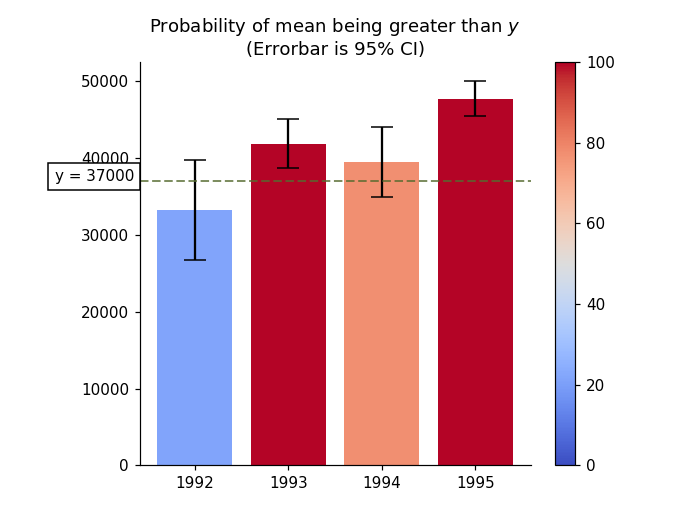

7

In [7]:
fig = plt.figure()
fig.subplots_adjust(left=0.2) 

# plot colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
plt.colorbar(sm,shrink=1)

#plot with y
def myplot(y):
    ax = plt.gca()
    pmc = plt.bar(means.index,means.values,yerr=ci95,capsize=7,color=get_color(y))
    hoz_line = plt.axhline(y=y, color='darkolivegreen', linewidth=1, linestyle='--');
    plt.xticks(list(df.index))
    
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    y_text = plt.text(1990.5, y, 'y = %d' %y, bbox=dict(fc='white',ec='k'));
    ax.set_title("Probability of mean being greater than $y$\n(Errorbar is 95% CI)")

# first show
myplot(y)
plt.show()


# define interactive
def onclick(event):
    plt.cla()
    myplot(event.ydata)
    hoz_line.set_ydata(event.ydata)
plt.gcf().canvas.mpl_connect('button_press_event', onclick)